<a href="https://colab.research.google.com/github/Subham-285/Cricket-Analysis/blob/main/RCB_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Performance Analysis of RCB in IPL 2022

In [ ]:
pip install opendatasets --upgrade --quiet

## Uploading Datasets from kaggle

In [ ]:
import opendatasets as od
url = 'https://www.kaggle.com/datasets/vora1011/ipl-2022-match-dataset?select=IPL_Ball_by_Ball_2022.csv'
od.download(url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ksubham285
Your Kaggle Key: ··········


100%|██████████| 132k/132k [00:00<00:00, 42.5MB/s]

In [ ]:
url1 = 'https://www.kaggle.com/datasets/vora1011/ipl-2022-match-dataset?select=IPL_Matches_2022.csv'
od.download(url1, force = True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ksubham285
Your Kaggle Key: ··········


100%|██████████| 132k/132k [00:00<00:00, 26.9MB/s]

In [ ]:
ball_by_ball_data = ('/content/ipl-2022-match-dataset/IPL_Ball_by_Ball_2022.csv')

In [ ]:
match_data = ('/content/ipl-2022-match-dataset/IPL_Matches_2022.csv')

## Data Visualization and Cleaning

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
df_balls = pd.read_csv(ball_by_ball_data)

In [ ]:
df_match = pd.read_csv(match_data)

In [ ]:
df_balls.head(10)

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
5,1312200,1,0,6,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
6,1312200,1,1,1,JC Buttler,Yash Dayal,YBK Jaiswal,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
7,1312200,1,1,2,JC Buttler,Yash Dayal,YBK Jaiswal,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
8,1312200,1,1,3,JC Buttler,Yash Dayal,YBK Jaiswal,NaN,4,0,4,0,0,NaN,NaN,NaN,Rajasthan Royals
9,1312200,1,1,4,JC Buttler,Yash Dayal,YBK Jaiswal,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [ ]:
df_balls.describe()

,ID,innings,overs,ballnumber,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery
count,1.791200e+04,17912.000000,17912.000000,17912.000000,17912.000000,17912.000000,17912.000000,17912.000000,17912.000000
mean,1.304524e+06,1.485317,9.290085,3.652077,1.286958,0.074978,1.361936,0.000167,0.050916
std,1.843446e+03,0.499798,5.690914,1.837818,1.701842,0.372878,1.688991,0.012941,0.219831
min,1.304047e+06,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.304065e+06,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.304084e+06,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.304102e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.312200e+06,2.000000,19.000000,10.000000,6.000000,5.000000,7.000000,1.000000,1.000000


In [ ]:
df_balls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17912 entries, 0 to 17911
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 17912 non-null  int64 
 1   innings            17912 non-null  int64 
 2   overs              17912 non-null  int64 
 3   ballnumber         17912 non-null  int64 
 4   batter             17912 non-null  object
 5   bowler             17912 non-null  object
 6   non-striker        17912 non-null  object
 7   extra_type         1050 non-null   object
 8   batsman_run        17912 non-null  int64 
 9   extras_run         17912 non-null  int64 
 10  total_run          17912 non-null  int64 
 11  non_boundary       17912 non-null  int64 
 12  isWicketDelivery   17912 non-null  int64 
 13  player_out         912 non-null    object
 14  kind               912 non-null    object
 15  fielders_involved  704 non-null    object
 16  BattingTeam        17912 non-null  objec

In [ ]:
df_balls.isnull().sum()

ID                       0
innings                  0
overs                    0
ballnumber               0
batter                   0
bowler                   0
non-striker              0
extra_type           16862
batsman_run              0
extras_run               0
total_run                0
non_boundary             0
isWicketDelivery         0
player_out           17000
kind                 17000
fielders_involved    17208
BattingTeam              0
dtype: int64

In [ ]:
df_balls.columns

Index(['ID', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'extra_type', 'batsman_run', 'extras_run', 'total_run',
       'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam'],
      dtype='object')

In [ ]:
df_balls['BattingTeam'].unique()

array(['Rajasthan Royals', 'Gujarat Titans',
       'Royal Challengers Bangalore', 'Lucknow Super Giants',
       'Sunrisers Hyderabad', 'Punjab Kings', 'Delhi Capitals',
       'Mumbai Indians', 'Chennai Super Kings', 'Kolkata Knight Riders'],
      dtype=object)

In [ ]:
df_match.head(10)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan
5,1304115,Mumbai,2022-05-21,2022,69,Delhi Capitals,Mumbai Indians,"Wankhede Stadium, Mumbai",Mumbai Indians,field,N,Mumbai Indians,Wickets,5,NaN,JJ Bumrah,"['PP Shaw', 'DA Warner', 'MR Marsh', 'RR Pant'...","['Ishan Kishan', 'RG Sharma', 'D Brevis', 'Til...",Nitin Menon,Tapan Sharma
6,1304114,Mumbai,2022-05-20,2022,68,Chennai Super Kings,Rajasthan Royals,"Brabourne Stadium, Mumbai",Chennai Super Kings,bat,N,Rajasthan Royals,Wickets,5,NaN,R Ashwin,"['RD Gaikwad', 'DP Conway', 'MM Ali', 'N Jagad...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,NA Patwardhan
7,1304113,Mumbai,2022-05-19,2022,67,Gujarat Titans,Royal Challengers Bangalore,"Wankhede Stadium, Mumbai",Gujarat Titans,bat,N,Royal Challengers Bangalore,Wickets,8,NaN,V Kohli,"['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...","['V Kohli', 'F du Plessis', 'GJ Maxwell', 'KD ...",KN Ananthapadmanabhan,GR Sadashiv Iyer
8,1304112,Navi Mumbai,2022-05-18,2022,66,Lucknow Super Giants,Kolkata Knight Riders,"Dr DY Patil Sports Academy, Mumbai",Lucknow Super Giants,bat,N,Lucknow Super Giants,Runs,2,NaN,Q de Kock,"['Q de Kock', 'KL Rahul', 'E Lewis', 'DJ Hooda...","['VR Iyer', 'A Tomar', 'N Rana', 'SS Iyer', 'S...",R Pandit,YC Barde
9,1304111,Mumbai,2022-05-17,2022,65,Sunrisers Hyderabad,Mumbai Indians,"Wankhede Stadium, Mumbai",Mumbai Indians,field,N,Sunrisers Hyderabad,Runs,3,NaN,RA Tripathi,"['Abhishek Sharma', 'PK Garg', 'RA Tripathi', ...","['RG Sharma', 'Ishan Kishan', 'DR Sams', 'Tila...",CB Gaffaney,N Pandit


In [ ]:
df_match.describe()

,ID,Season,Margin,method
count,7.400000e+01,74.0,74.000000,0.0
mean,1.304520e+06,2022.0,16.972973,NaN
std,1.848086e+03,0.0,19.651047,NaN
min,1.304047e+06,2022.0,2.000000,NaN
25%,1.304065e+06,2022.0,5.250000,NaN
50%,1.304084e+06,2022.0,8.000000,NaN
75%,1.304102e+06,2022.0,18.000000,NaN
max,1.312200e+06,2022.0,91.000000,NaN


In [ ]:
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               74 non-null     int64  
 1   City             74 non-null     object 
 2   Date             74 non-null     object 
 3   Season           74 non-null     int64  
 4   MatchNumber      74 non-null     object 
 5   Team1            74 non-null     object 
 6   Team2            74 non-null     object 
 7   Venue            74 non-null     object 
 8   TossWinner       74 non-null     object 
 9   TossDecision     74 non-null     object 
 10  SuperOver        74 non-null     object 
 11  WinningTeam      74 non-null     object 
 12  WonBy            74 non-null     object 
 13  Margin           74 non-null     int64  
 14  method           0 non-null      float64
 15  Player_of_Match  74 non-null     object 
 16  Team1Players     74 non-null     object 
 17  Team2Players     7

In [ ]:
df_match.isnull().sum()

ID                  0
City                0
Date                0
Season              0
MatchNumber         0
Team1               0
Team2               0
Venue               0
TossWinner          0
TossDecision        0
SuperOver           0
WinningTeam         0
WonBy               0
Margin              0
method             74
Player_of_Match     0
Team1Players        0
Team2Players        0
Umpire1             0
Umpire2             0
dtype: int64

In [ ]:
df_match.drop('method', inplace = True, axis=1)

In [ ]:
df_match.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'Player_of_Match', 'Team1Players', 'Team2Players',
       'Umpire1', 'Umpire2'],
      dtype='object')

## Performance at different Venues

In [ ]:
rcb_results = df_match.loc[(df_match['Team1']=='Royal Challengers Bangalore') | (df_match['Team2']=='Royal Challengers Bangalore'), :].copy()
rcb_results['Vs'] = rcb_results['Team1'] + rcb_results['Team2']
rcb_results['Vs'] = rcb_results['Vs'].str.replace('Royal Challengers Bangalore', '')

In [ ]:
rcb_results.drop(['Team1','Team2'], axis=1, inplace = True)

In [ ]:
rcb_results['WinningTeam'] = rcb_results['WinningTeam'].apply(lambda x: 'Win' if x =='Royal Challengers Bangalore' else 'Loss')
rcb_results.set_index('ID', inplace=True)

In [ ]:
rcb_venue_results = rcb_results.groupby(['Venue', 'WinningTeam']).count()['City']
rcb_venue_results = rcb_venue_results.unstack()
rcb_venue_results.sort_values(by = ['Loss', 'Win'],ascending = [False,True], inplace = True)
rcb_venue_results

WinningTeam,Loss,Win
Venue,,
"Brabourne Stadium, Mumbai",3.0,NaN
"Dr DY Patil Sports Academy, Mumbai",2.0,2.0
"Maharashtra Cricket Association Stadium, Pune",1.0,2.0
"Narendra Modi Stadium, Ahmedabad",1.0,NaN
"Eden Gardens, Kolkata",NaN,1.0
"Wankhede Stadium, Mumbai",NaN,4.0


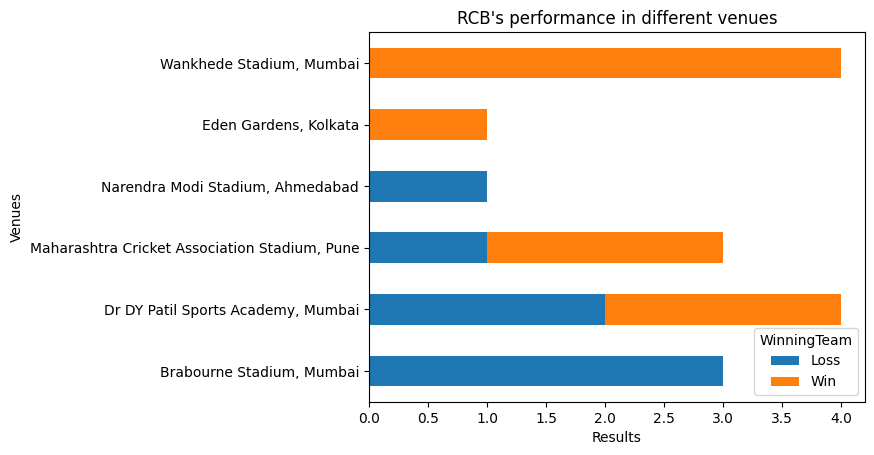

In [ ]:
rcb_venue_results.plot(kind = 'barh', stacked = True)
plt.title("RCB's performance in different venues")
plt.xlabel('Results')
plt.ylabel('Venues')
plt.show()


RCB had 100% performance at wankhede stadium,Mumbai.Its pitch suited the playing style and game plan of the team.


But, they were not able to win a single match in Braboune stadium which is also in Mumbai.

Team also had a good performance in MCA stadium,Pune.

## RCB's toss results

*   We look at how was RCB's luck at toss.
*   Also we look at how did the toss affect RCB's result in league.



In [ ]:
rcb_results['Toss'] = rcb_results['TossWinner'].apply(lambda x: 'Won the toss' if x =='Royal Challengers Bangalore' else 'Lost the toss')
rcb_results.rename(columns ={'Winning Team':'Results'}, inplace = True)
rcb_results.drop('SuperOver', axis = 1, inplace = True)

In [ ]:
rcb_results['First Innings'] = np.where(rcb_results['TossWinner'] == 'Royal Challengers Bangalore', rcb_results['TossDecision'],'0' +rcb_results['TossDecision'])

In [ ]:
rcb_results['First Innings'] = rcb_results['First Innings'].str.replace('0field','bat')
rcb_results['First Innings'] = rcb_results['First Innings'].str.replace('0bat','field')

In [ ]:
rcb_results['First Innings'] = rcb_results['First Innings'].str.replace('0field','bat')
rcb_results['First Innings'] = rcb_results['First Innings'].str.replace('0bat','field')

In [ ]:
rcb_results.rename(columns={'WinningTeam':'Results'}, inplace = True)

In [ ]:
toss_results = rcb_results[['Toss', 'Results', 'Season']].groupby(['Toss','Results']).count()
toss_results

Season
Toss          Results        
Lost the toss Loss          3
              Win           5
Won the toss  Loss          4
              Win           4

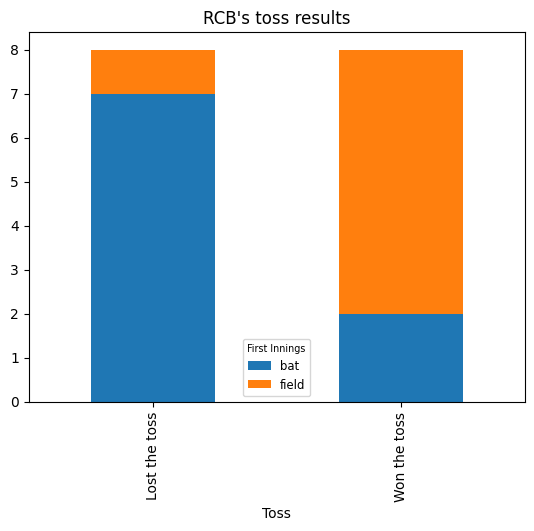

In [ ]:
pd.crosstab(rcb_results['Toss'], rcb_results['First Innings']).plot(kind='bar', stacked=True)
plt.title("RCB's toss results")
plt.legend(fontsize='small',title_fontsize='x-small', title='First Innings')
plt.show()

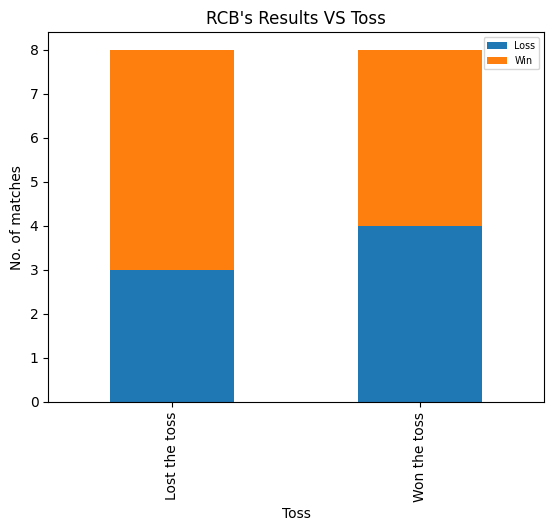

In [ ]:
pd.crosstab(rcb_results['Toss'], rcb_results['Results']).plot(kind='bar', stacked=True)
plt.title("RCB's Results VS Toss")
plt.legend(fontsize='x-small')
plt.ylabel('No. of matches')
plt.show()

This shows that RCB's performance is not affected by the toss.

In [ ]:
rcb_results.reset_index(inplace = True)

In [ ]:
rcb_results

,ID,City,Date,Season,MatchNumber,Venue,TossWinner,TossDecision,Results,WonBy,Margin,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,Vs,Toss,First Innings
0,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,Loss,Wickets,7,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,Rajasthan Royals,Lost the toss,bat
1,1312198,Kolkata,2022-05-25,2022,Eliminator,"Eden Gardens, Kolkata",Lucknow Super Giants,field,Win,Runs,14,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,Lucknow Super Giants,Lost the toss,bat
2,1304113,Mumbai,2022-05-19,2022,67,"Wankhede Stadium, Mumbai",Gujarat Titans,bat,Win,Wickets,8,V Kohli,"['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...","['V Kohli', 'F du Plessis', 'GJ Maxwell', 'KD ...",KN Ananthapadmanabhan,GR Sadashiv Iyer,Gujarat Titans,Lost the toss,field
3,1304106,Mumbai,2022-05-13,2022,60,"Brabourne Stadium, Mumbai",Royal Challengers Bangalore,field,Loss,Runs,54,JM Bairstow,"['JM Bairstow', 'S Dhawan', 'PBB Rajapaksa', '...","['V Kohli', 'F du Plessis', 'RM Patidar', 'MK ...",J Madanagopal,N Pandit,Punjab Kings,Won the toss,field
4,1304100,Mumbai,2022-05-08,2022,54,"Wankhede Stadium, Mumbai",Royal Challengers Bangalore,bat,Win,Runs,67,PWH de Silva,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Abhishek Sharma', 'KS Williamson', 'RA Tripa...",BNJ Oxenford,N Pandit,Sunrisers Hyderabad,Won the toss,bat
5,1304095,Pune,2022-05-04,2022,49,"Maharashtra Cricket Association Stadium, Pune",Chennai Super Kings,field,Win,Runs,13,HV Patel,"['V Kohli', 'F du Plessis', 'GJ Maxwell', 'MK ...","['RD Gaikwad', 'DP Conway', 'RV Uthappa', 'AT ...",KN Ananthapadmanabhan,MA Gough,Chennai Super Kings,Lost the toss,bat
6,1304089,Mumbai,2022-04-30,2022,43,"Brabourne Stadium, Mumbai",Royal Challengers Bangalore,bat,Loss,Wickets,6,R Tewatia,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['WP Saha', 'Shubman Gill', 'B Sai Sudharsan',...",HAS Khalid,VK Sharma,Gujarat Titans,Won the toss,bat
7,1304085,Pune,2022-04-26,2022,39,"Maharashtra Cricket Association Stadium, Pune",Royal Challengers Bangalore,field,Loss,Runs,29,R Parag,"['JC Buttler', 'D Padikkal', 'R Ashwin', 'SV S...","['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...",BNJ Oxenford,KN Ananthapadmanabhan,Rajasthan Royals,Won the toss,field
8,1304082,Mumbai,2022-04-23,2022,36,"Brabourne Stadium, Mumbai",Sunrisers Hyderabad,field,Loss,Wickets,9,M Jansen,"['F du Plessis', 'Anuj Rawat', 'V Kohli', 'GJ ...","['Abhishek Sharma', 'KS Williamson', 'RA Tripa...",Chirra Ravikanthreddy,J Madanagopal,Sunrisers Hyderabad,Lost the toss,bat
9,1304077,Mumbai,2022-04-19,2022,31,"Dr DY Patil Sports Academy, Mumbai",Lucknow Super Giants,field,Win,Runs,18,F du Plessis,"['Anuj Rawat', 'F du Plessis', 'V Kohli', 'GJ ...","['Q de Kock', 'KL Rahul', 'MK Pandey', 'KH Pan...",CB Gaffaney,N Pandit,Lucknow Super Giants,Lost the toss,bat


## Average Runs scored by RCB as compared to other teams

In [ ]:
run_rate = df_balls[['overs','total_run']].groupby('overs').mean()*6
run_rate = run_rate.rename(columns={'total_run':'league_average'})
run_rate['RCB_rr'] = df_balls.loc[df_balls['BattingTeam']=='Royal Challengers Bangalore',['overs','total_run']].groupby('overs').mean()*6

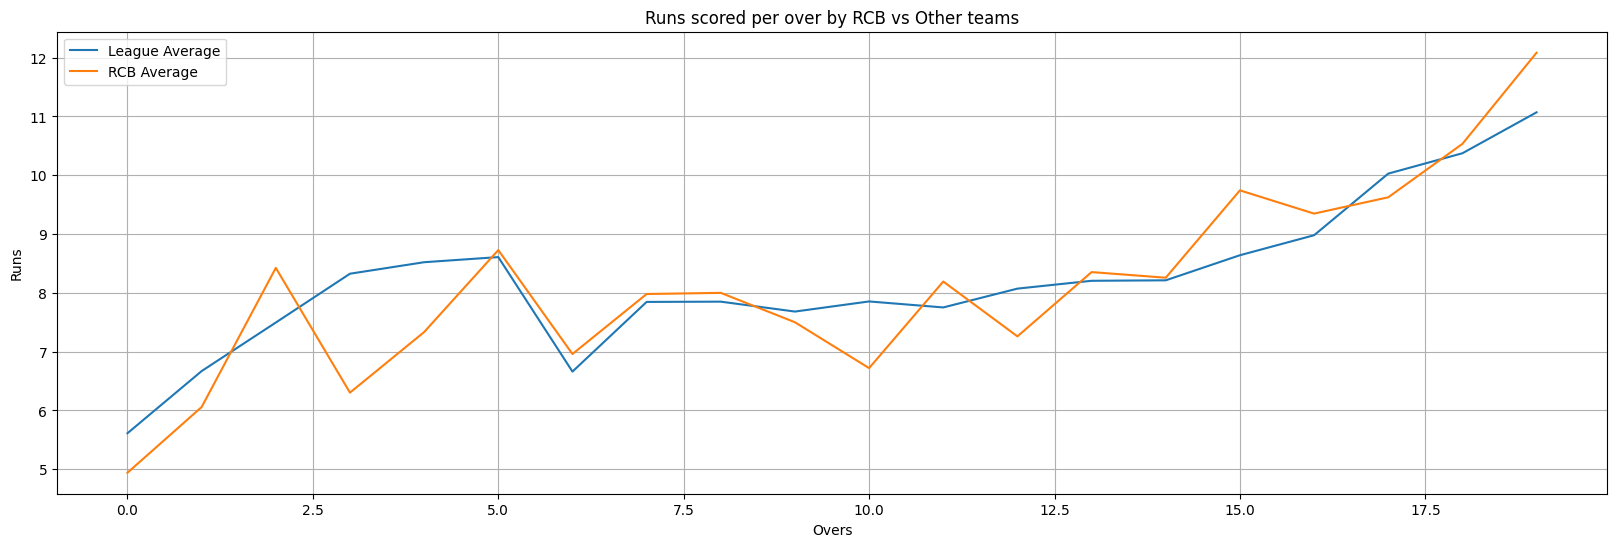

In [ ]:
plt.figure(figsize = (20,6))
plt.title("Runs scored per over by RCB vs Other teams")
plt.plot(run_rate['league_average'].index, run_rate['league_average'].values, label = 'League Average')
plt.plot(run_rate['RCB_rr'],label = 'RCB Average')
plt.xlabel('Overs')
plt.ylabel('Runs')
plt.legend()
plt.grid()
plt.show()

RCB had a lower run rate in powerplay and middle overs. They were not consistently able to score runs at a better run rate.

But,during the death overs they were able to peak very well and scored a lot of runs.

## Average runs conceded by RCB as compared to other teams

In [ ]:
rcb_match_id = rcb_results['ID']

In [ ]:
run_rate = df_balls[['overs','total_run']].groupby('overs').mean()*6
run_rate = run_rate.rename(columns={'total_run':'league_average'})
run_rate['RCB_rr'] = df_balls.loc[df_balls['BattingTeam']=='Royal Challengers Bangalore',['overs','total_run']].groupby('overs').mean()*6
run_rate['RCB_eco'] = df_balls.loc[(df_balls['ID'].isin(rcb_match_id)) & (df_balls['BattingTeam'] != 'Royal Challengers Bangalore')][['overs','total_run']].groupby('overs').mean()*6

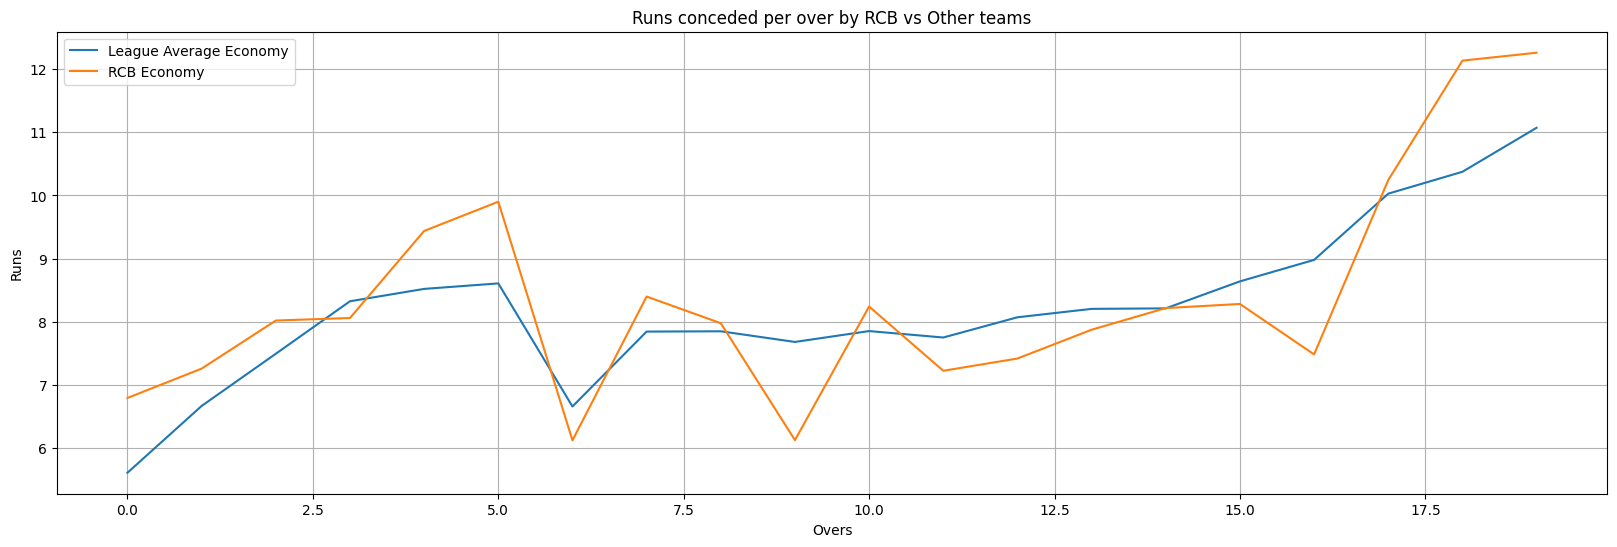

In [ ]:
plt.figure(figsize = (20,6))
plt.title("Runs conceded per over by RCB vs Other teams")
plt.plot(run_rate['league_average'].index, run_rate['league_average'].values, label = 'League Average Economy')
plt.plot(run_rate['RCB_eco'],label = 'RCB Economy')
plt.xlabel('Overs')
plt.ylabel('Runs')
plt.legend()
plt.grid()
plt.show()

RCB had very high economy in powerplay and death overs. Fast bowlers weren't bowling very well and also weren't able to take wickets due to which they conceded a lot of runs.

RCB was very good in middle overs and their economy was also less than league average. This shows that the spinners did very well especially PWH de Silva as he was also the highest wicket taker.

## RCB  top Batsman's Performances

In [ ]:
rcb_runs = df_balls.loc[df_balls['BattingTeam']=='Royal Challengers Bangalore', ['batter','batsman_run']].groupby('batter').sum().sort_values(by ='batsman_run',ascending = False)[0:6]
rcb_top_runscorers = rcb_runs.index
rcb_runs

,batsman_run
batter,
F du Plessis,468
V Kohli,341
RM Patidar,333
KD Karthik,330
GJ Maxwell,301
Shahbaz Ahmed,219


In [ ]:
top6_rcb = df_balls[['ID', 'batter', 'batsman_run']].loc[(df_balls['BattingTeam'] == 'Royal Challengers Bangalore') & (df_balls['batter'].isin(rcb_top_runscorers))].groupby(['ID','batter']).sum().sort_index().unstack()
top6_rcb = top6_rcb.cumsum()
top6_rcb

batsman_run                                                       
batter  F du Plessis GJ Maxwell KD Karthik RM Patidar Shahbaz Ahmed V Kohli
ID                                                                         
1304049         88.0        NaN       32.0        NaN           NaN    41.0
1304052         93.0        NaN       46.0        NaN          27.0    53.0
1304059        122.0        NaN       90.0        NaN          72.0    58.0
1304064        138.0        8.0       97.0        NaN           NaN   106.0
1304068        146.0       34.0      131.0        NaN         113.0   107.0
1304073        154.0       89.0      197.0        NaN         145.0   119.0
1304077        250.0      112.0      210.0        NaN         171.0   119.0
1304082        255.0      124.0      210.0        NaN         178.0   119.0
1304085        278.0      124.0      216.0       16.0         195.0   128.0
1304089        278.0      157.0      218.0       68.0         197.0   186.0
1304095        316.0      160.0      244.0       89.0         198.0   216.0
1304100        389.0      193.0      274.0      137.0           NaN   216.0
1304106        399.0      228.0      285.0      163.0         207.0   236.0
1304113        443.0      268.0      287.0        NaN           NaN   309.0
1312198        443.0      277.0      324.0      275.0           NaN   334.0
1312199        468.0      301.0      330.0      333.0         219.0   341.0

In [ ]:
rcb_top_bat = df_balls[['ID', 'batter', 'batsman_run']].loc[(df_balls['BattingTeam'] == 'Royal Challengers Bangalore') & (df_balls['batter'].isin(rcb_top_runscorers))].groupby(['ID','batter']).sum().sort_index().unstack()
rcb_top_bat

batsman_run                                                       
batter  F du Plessis GJ Maxwell KD Karthik RM Patidar Shahbaz Ahmed V Kohli
ID                                                                         
1304049         88.0        NaN       32.0        NaN           NaN    41.0
1304052          5.0        NaN       14.0        NaN          27.0    12.0
1304059         29.0        NaN       44.0        NaN          45.0     5.0
1304064         16.0        8.0        7.0        NaN           NaN    48.0
1304068          8.0       26.0       34.0        NaN          41.0     1.0
1304073          8.0       55.0       66.0        NaN          32.0    12.0
1304077         96.0       23.0       13.0        NaN          26.0     0.0
1304082          5.0       12.0        0.0        NaN           7.0     0.0
1304085         23.0        0.0        6.0       16.0          17.0     9.0
1304089          0.0       33.0        2.0       52.0           2.0    58.0
1304095         38.0        3.0       26.0       21.0           1.0    30.0
1304100         73.0       33.0       30.0       48.0           NaN     0.0
1304106         10.0       35.0       11.0       26.0           9.0    20.0
1304113         44.0       40.0        2.0        NaN           NaN    73.0
1312198          0.0        9.0       37.0      112.0           NaN    25.0
1312199         25.0       24.0        6.0       58.0          12.0     7.0

In [ ]:
rcb_match_schedule = rcb_results[['ID','Date','Vs','Results']].copy().sort_values(by = 'ID')
rcb_match_schedule['Vs'].replace({'Punjab Kings':'PK','Kolkata Knight Riders':'KKR','Rajasthan Royals':'RR',
                              'Mumbai Indians':'MI','Chennai Super Kings':'CSK','Delhi Capitals':'DC',
                              'Lucknow Super Giants':'LSG','Sunrisers Hyderabad':'SRH','Gujarat Titans':'GT'},inplace=True)
rcb_match_schedule['Index'] = '('+ rcb_match_schedule['Date'] + ')' + rcb_match_schedule['Vs']
rcb_match_schedule

,ID,Date,Vs,Results,Index
15,1304049,2022-03-27,PK,Loss,(2022-03-27)PK
14,1304052,2022-03-30,KKR,Win,(2022-03-30)KKR
13,1304059,2022-04-05,RR,Win,(2022-04-05)RR
12,1304064,2022-04-09,MI,Win,(2022-04-09)MI
11,1304068,2022-04-12,CSK,Loss,(2022-04-12)CSK
10,1304073,2022-04-16,DC,Win,(2022-04-16)DC
9,1304077,2022-04-19,LSG,Win,(2022-04-19)LSG
8,1304082,2022-04-23,SRH,Loss,(2022-04-23)SRH
7,1304085,2022-04-26,RR,Loss,(2022-04-26)RR
6,1304089,2022-04-30,GT,Loss,(2022-04-30)GT


In [ ]:
rcb_top_bat = rcb_top_bat.merge(rcb_match_schedule,on = 'ID')
rcb_top_bat

,ID,"(batsman_run, F du Plessis)","(batsman_run, GJ Maxwell)","(batsman_run, KD Karthik)","(batsman_run, RM Patidar)","(batsman_run, Shahbaz Ahmed)","(batsman_run, V Kohli)",Date_x,Vs_x,Results_x,Index_x,Date_y,Vs_y,Results_y,Index_y
0,1304049,88.0,NaN,32.0,NaN,NaN,41.0,2022-03-27,PK,Loss,(2022-03-27)PK,2022-03-27,PK,Loss,(2022-03-27)PK
1,1304052,5.0,NaN,14.0,NaN,27.0,12.0,2022-03-30,KKR,Win,(2022-03-30)KKR,2022-03-30,KKR,Win,(2022-03-30)KKR
2,1304059,29.0,NaN,44.0,NaN,45.0,5.0,2022-04-05,RR,Win,(2022-04-05)RR,2022-04-05,RR,Win,(2022-04-05)RR
3,1304064,16.0,8.0,7.0,NaN,NaN,48.0,2022-04-09,MI,Win,(2022-04-09)MI,2022-04-09,MI,Win,(2022-04-09)MI
4,1304068,8.0,26.0,34.0,NaN,41.0,1.0,2022-04-12,CSK,Loss,(2022-04-12)CSK,2022-04-12,CSK,Loss,(2022-04-12)CSK
5,1304073,8.0,55.0,66.0,NaN,32.0,12.0,2022-04-16,DC,Win,(2022-04-16)DC,2022-04-16,DC,Win,(2022-04-16)DC
6,1304077,96.0,23.0,13.0,NaN,26.0,0.0,2022-04-19,LSG,Win,(2022-04-19)LSG,2022-04-19,LSG,Win,(2022-04-19)LSG
7,1304082,5.0,12.0,0.0,NaN,7.0,0.0,2022-04-23,SRH,Loss,(2022-04-23)SRH,2022-04-23,SRH,Loss,(2022-04-23)SRH
8,1304085,23.0,0.0,6.0,16.0,17.0,9.0,2022-04-26,RR,Loss,(2022-04-26)RR,2022-04-26,RR,Loss,(2022-04-26)RR
9,1304089,0.0,33.0,2.0,52.0,2.0,58.0,2022-04-30,GT,Loss,(2022-04-30)GT,2022-04-30,GT,Loss,(2022-04-30)GT


In [ ]:
top6_rcb.index = rcb_match_schedule['Index'].astype('str')

In [ ]:
top6_rcb = top6_rcb.fillna(method = 'ffill').fillna(0).applymap(lambda x : int (x))

In [ ]:
top6_rcb

batsman_run                                                 \
batter          F du Plessis GJ Maxwell KD Karthik RM Patidar Shahbaz Ahmed   
Index                                                                         
(2022-03-27)PK            88          0         32          0             0   
(2022-03-30)KKR           93          0         46          0            27   
(2022-04-05)RR           122          0         90          0            72   
(2022-04-09)MI           138          8         97          0            72   
(2022-04-12)CSK          146         34        131          0           113   
(2022-04-16)DC           154         89        197          0           145   
(2022-04-19)LSG          250        112        210          0           171   
(2022-04-23)SRH          255        124        210          0           178   
(2022-04-26)RR           278        124        216         16           195   
(2022-04-30)GT           278        157        218         68           197   
(2022-05-04)CSK          316        160        244         89           198   
(2022-05-08)SRH          389        193        274        137           198   
(2022-05-13)PK           399        228        285        163           207   
(2022-05-19)GT           443        268        287        163           207   
(2022-05-25)LSG          443        277        324        275           207   
(2022-05-27)RR           468        301        330        333           219   

                         
batter          V Kohli  
Index                    
(2022-03-27)PK       41  
(2022-03-30)KKR      53  
(2022-04-05)RR       58  
(2022-04-09)MI      106  
(2022-04-12)CSK     107  
(2022-04-16)DC      119  
(2022-04-19)LSG     119  
(2022-04-23)SRH     119  
(2022-04-26)RR      128  
(2022-04-30)GT      186  
(2022-05-04)CSK     216  
(2022-05-08)SRH     216  
(2022-05-13)PK      236  
(2022-05-19)GT      309  
(2022-05-25)LSG     334  
(2022-05-27)RR      341

In [ ]:
top6_rcb = top6_rcb.merge(rcb_match_schedule,on='Index')
top6_rcb

,Index,"(batsman_run, F du Plessis)","(batsman_run, GJ Maxwell)","(batsman_run, KD Karthik)","(batsman_run, RM Patidar)","(batsman_run, Shahbaz Ahmed)","(batsman_run, V Kohli)",ID_x,Date_x,Vs_x,Results_x,ID_y,Date_y,Vs_y,Results_y
0,(2022-03-27)PK,88,0,32,0,0,41,1304049,2022-03-27,PK,Loss,1304049,2022-03-27,PK,Loss
1,(2022-03-30)KKR,93,0,46,0,27,53,1304052,2022-03-30,KKR,Win,1304052,2022-03-30,KKR,Win
2,(2022-04-05)RR,122,0,90,0,72,58,1304059,2022-04-05,RR,Win,1304059,2022-04-05,RR,Win
3,(2022-04-09)MI,138,8,97,0,72,106,1304064,2022-04-09,MI,Win,1304064,2022-04-09,MI,Win
4,(2022-04-12)CSK,146,34,131,0,113,107,1304068,2022-04-12,CSK,Loss,1304068,2022-04-12,CSK,Loss
5,(2022-04-16)DC,154,89,197,0,145,119,1304073,2022-04-16,DC,Win,1304073,2022-04-16,DC,Win
6,(2022-04-19)LSG,250,112,210,0,171,119,1304077,2022-04-19,LSG,Win,1304077,2022-04-19,LSG,Win
7,(2022-04-23)SRH,255,124,210,0,178,119,1304082,2022-04-23,SRH,Loss,1304082,2022-04-23,SRH,Loss
8,(2022-04-26)RR,278,124,216,16,195,128,1304085,2022-04-26,RR,Loss,1304085,2022-04-26,RR,Loss
9,(2022-04-30)GT,278,157,218,68,197,186,1304089,2022-04-30,GT,Loss,1304089,2022-04-30,GT,Loss


1. Rcb won 6 out of 8 games in which F du Plessis scoered more than 20 runs.
2. RCB won all the games where KD Karthik and Shahbaz Ahmed scored more than 30 runs combined.

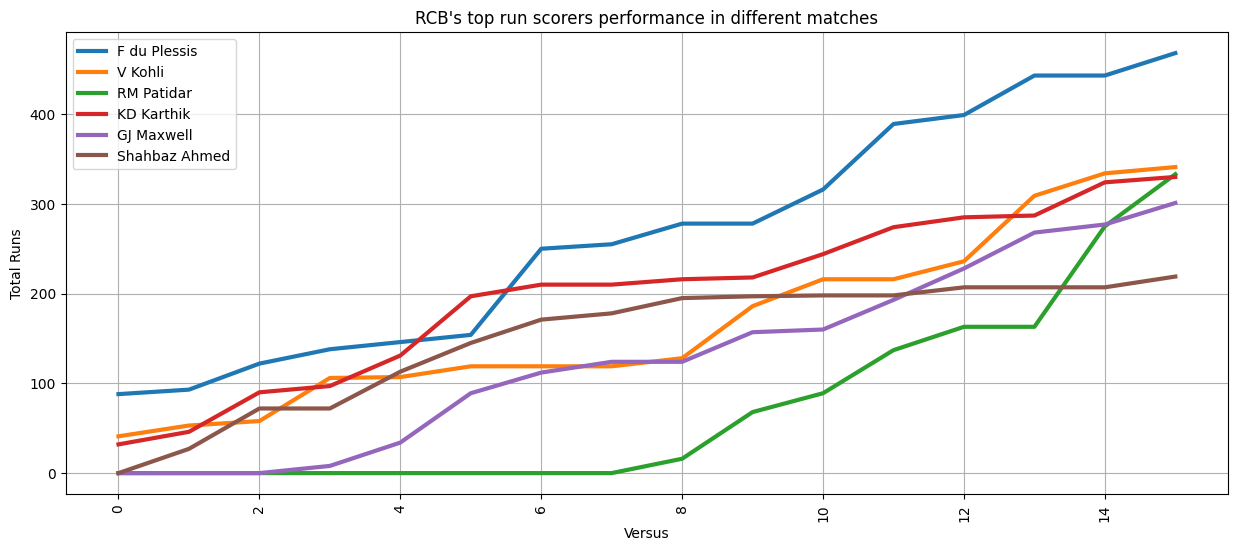

In [ ]:
plt.figure(figsize = (15,6))
plt.title("RCB's top run scorers performance in different matches")
plt.plot(top6_rcb[('batsman_run','F du Plessis')], linewidth=3, label = 'F du Plessis')
plt.plot(top6_rcb[('batsman_run','V Kohli')], linewidth=3, label = 'V Kohli')
plt.plot(top6_rcb[('batsman_run','RM Patidar')], linewidth=3, label = 'RM Patidar')
plt.plot(top6_rcb[('batsman_run','KD Karthik')], linewidth=3, label = 'KD Karthik')
plt.plot(top6_rcb[('batsman_run','GJ Maxwell')], linewidth=3, label = 'GJ Maxwell')
plt.plot(top6_rcb[('batsman_run','Shahbaz Ahmed')], linewidth=3, label = 'Shahbaz Ahmed')
plt.xticks(rotation=90)
plt.xlabel('Versus')
plt.ylabel('Total Runs')
plt.legend()
plt.grid()
plt.show()



1.   F du Plessis was highest run scorer of the team followed by V Kohli.
2.   KD Karthik and Shahbaz Ahmed who come lower down the order are among the top scorers which shows that the top order had not performed very well which can also be seen as team's run rate in first 10 overs is less as compared to league average.

3. RM Patidar who is also among top scorers came in very late after being out due to an injury but still was able to make it inot top scorers.





## RCB's Top Bowlers Performance

In [ ]:
rcb_balls = df_balls.loc[df_balls['ID'].isin(rcb_match_id)]
rcb_bowling = rcb_balls.loc[(rcb_balls['BattingTeam']!='Royal Challengers Bangalore') & (rcb_balls['isWicketDelivery'] == 1) & (rcb_balls['kind'] != 'run out') ]
rcb_bowling

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
390,1312199,2,5,1,YBK Jaiswal,JR Hazlewood,JC Buttler,NaN,0,0,0,0,1,YBK Jaiswal,caught,V Kohli,Rajasthan Royals
429,1312199,2,11,4,SV Samson,PWH de Silva,JC Buttler,NaN,0,0,0,0,1,SV Samson,stumped,KD Karthik,Rajasthan Royals
460,1312199,2,16,5,D Padikkal,JR Hazlewood,JC Buttler,NaN,0,0,0,0,1,D Padikkal,caught,KD Karthik,Rajasthan Royals
600,1312198,2,0,6,Q de Kock,Mohammed Siraj,KL Rahul,NaN,0,0,0,0,1,Q de Kock,caught,F du Plessis,Lucknow Super Giants
622,1312198,2,4,3,M Vohra,JR Hazlewood,KL Rahul,NaN,0,0,0,0,1,M Vohra,caught,Shahbaz Ahmed,Lucknow Super Giants
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17354,1304049,2,7,1,MA Agarwal,PWH de Silva,S Dhawan,NaN,0,0,0,0,1,MA Agarwal,caught,Shahbaz Ahmed,Punjab Kings
17379,1304049,2,11,2,S Dhawan,HV Patel,PBB Rajapaksa,NaN,0,0,0,0,1,S Dhawan,caught,Anuj Rawat,Punjab Kings
17392,1304049,2,13,1,PBB Rajapaksa,Mohammed Siraj,LS Livingstone,NaN,0,0,0,0,1,PBB Rajapaksa,caught,Shahbaz Ahmed,Punjab Kings
17393,1304049,2,13,2,RA Bawa,Mohammed Siraj,LS Livingstone,NaN,0,0,0,0,1,RA Bawa,lbw,NaN,Punjab Kings


In [ ]:
rcb_top_bowlers = rcb_bowling['bowler'].value_counts()[0:5].index
rcb_top_bowlers

Index(['PWH de Silva', 'JR Hazlewood', 'HV Patel', 'Mohammed Siraj',
       'GJ Maxwell'],
      dtype='object')

In [ ]:
rcb_wickettakers = rcb_bowling.loc[rcb_bowling['bowler'].isin(rcb_top_bowlers)]
rcb_wickettakers = rcb_wickettakers[['ID', 'bowler', 'isWicketDelivery']].groupby(['ID','bowler']).sum().unstack()
rcb_wickettakers

isWicketDelivery                                                  
bowler        GJ Maxwell HV Patel JR Hazlewood Mohammed Siraj PWH de Silva
ID                                                                        
1304049              NaN      1.0          NaN            2.0          1.0
1304052              NaN      2.0          NaN            1.0          4.0
1304059              NaN      1.0          NaN            NaN          1.0
1304064              NaN      2.0          NaN            NaN          2.0
1304068              NaN      NaN          1.0            NaN          2.0
1304073              NaN      NaN          3.0            2.0          1.0
1304077              1.0      2.0          4.0            1.0          NaN
1304082              NaN      1.0          NaN            NaN          NaN
1304085              NaN      1.0          2.0            2.0          2.0
1304089              NaN      NaN          NaN            NaN          2.0
1304095              2.0      3.0          1.0            NaN          1.0
1304100              1.0      1.0          2.0            NaN          5.0
1304106              1.0      4.0          NaN            NaN          2.0
1304113              1.0      NaN          2.0            NaN          1.0
1312198              NaN      1.0          3.0            1.0          1.0
1312199              NaN      NaN          2.0            NaN          1.0

In [ ]:
rcb_wickettakers = rcb_wickettakers.cumsum().fillna(method = 'ffill').fillna(0)

In [ ]:
rcb_wickettakers.index = top6_rcb.index

In [ ]:
rcb_wickettakers

isWicketDelivery                                                  
bowler       GJ Maxwell HV Patel JR Hazlewood Mohammed Siraj PWH de Silva
0                   0.0      1.0          0.0            2.0          1.0
1                   0.0      3.0          0.0            3.0          5.0
2                   0.0      4.0          0.0            3.0          6.0
3                   0.0      6.0          0.0            3.0          8.0
4                   0.0      6.0          1.0            3.0         10.0
5                   0.0      6.0          4.0            5.0         11.0
6                   1.0      8.0          8.0            6.0         11.0
7                   1.0      9.0          8.0            6.0         11.0
8                   1.0     10.0         10.0            8.0         13.0
9                   1.0     10.0         10.0            8.0         15.0
10                  3.0     13.0         11.0            8.0         16.0
11                  4.0     14.0         13.0            8.0         21.0
12                  5.0     18.0         13.0            8.0         23.0
13                  6.0     18.0         15.0            8.0         24.0
14                  6.0     19.0         18.0            9.0         25.0
15                  6.0     19.0         20.0            9.0         26.0

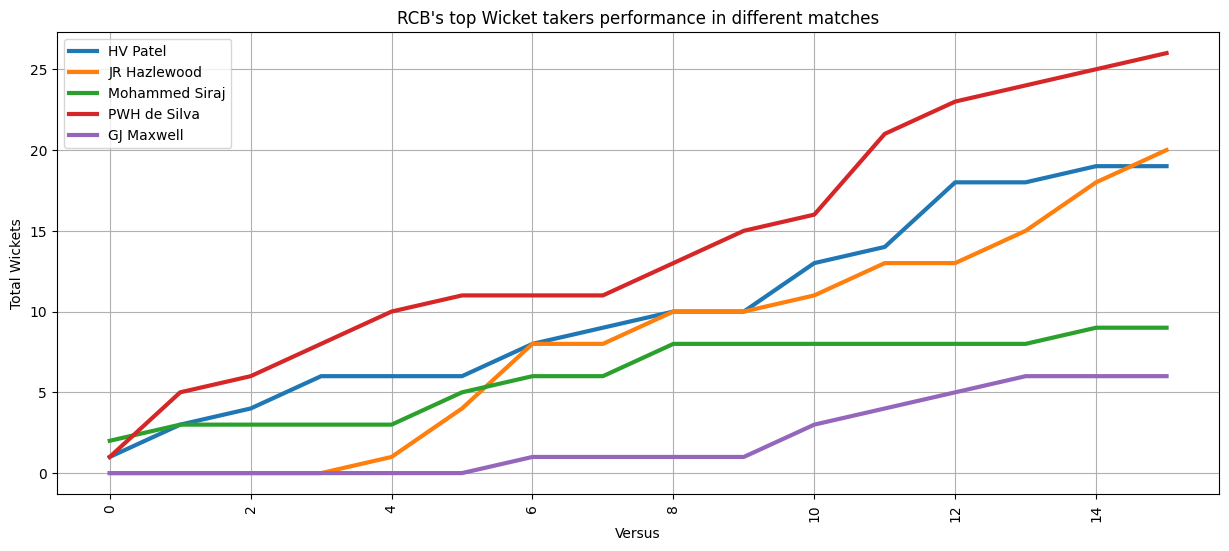

In [ ]:
plt.figure(figsize = (15,6))
plt.title("RCB's top Wicket takers performance in different matches")
plt.plot(rcb_wickettakers[('isWicketDelivery','HV Patel')], linewidth=3, label = 'HV Patel')
plt.plot(rcb_wickettakers[('isWicketDelivery','JR Hazlewood')], linewidth=3, label = 'JR Hazlewood')
plt.plot(rcb_wickettakers[('isWicketDelivery','Mohammed Siraj')], linewidth=3, label = 'Mohammed Siraj')
plt.plot(rcb_wickettakers[('isWicketDelivery','PWH de Silva')], linewidth=3, label = 'PWH de Silva')
plt.plot(rcb_wickettakers[('isWicketDelivery','GJ Maxwell')], linewidth=3, label = 'GJ Maxwell')
plt.xticks(rotation=90)
plt.xlabel('Versus')
plt.ylabel('Total Wickets')
plt.legend()
plt.grid()
plt.show()



1.   PWH de Silva was the highest wicket taker for the team accompanied by JR Hazlewood and HV Patel.
2.   Bowlers conceded a lot of runs and had a very high economy.
3. Mohammed Siraj had a very bad season and was not able to take wickets and also had a very high economy.

